In [1]:
import pandas as pd 

In [2]:
df= pd.read_csv('simulated_train_crowd_data.csv')

In [3]:
df

,Train No,Station,Time,Day,Crowd Level
0,12876,NDLS,14:00,Tuesday,High
1,14115,Howrah,12:00,Sunday,Medium
2,14265,Dhanbad,18:00,Friday,Medium
3,12261,Solapur,18:00,Saturday,Medium
4,12261,Solapur,08:00,Saturday,High
...,...,...,...,...,...
195,22123,Varanasi,16:00,Tuesday,Very High
196,13123,Lucknow,04:00,Thursday,High
197,12002,Mumbai CST,10:00,Thursday,Medium
198,22123,Mumbai CST,12:00,Sunday,High


In [4]:
# this dataframe limits our scope we can deduce the crowd level by train no,. or for a particukar train at afternoon night and evening
# for example for the train no. 129151 it is highly crowded in morning and medium crowd is in afternoon and low in evening

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Train No     200 non-null    int64 
 1   Station      200 non-null    object
 2   Time         200 non-null    object
 3   Day          200 non-null    object
 4   Crowd Level  200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [6]:
Train = df.iloc[:,:1]

In [7]:
Train

,Train No
0,12876
1,14115
2,14265
3,12261
4,12261
...,...
195,22123
196,13123
197,12002
198,22123


In [8]:
train_counts = df['Train No'].value_counts().reset_index()

In [9]:
train_counts

,Train No,count
0,14265,29
1,12261,23
2,12002,22
3,12951,22
4,13123,19
5,12312,19
6,11056,18
7,12876,18
8,14115,16
9,22123,14


In [10]:
Trains = train_counts['Train No'].reset_index()

In [11]:
Trains

,index,Train No
0,0,14265
1,1,12261
2,2,12002
3,3,12951
4,4,13123
5,5,12312
6,6,11056
7,7,12876
8,8,14115
9,9,22123


In [12]:
Trains.drop(columns = ['index'], inplace = True)

In [13]:
Trains

,Train No
0,14265
1,12261
2,12002
3,12951
4,13123
5,12312
6,11056
7,12876
8,14115
9,22123


In [14]:
Times_count =  df['Time'].value_counts().reset_index()

In [15]:
Times_count

,Time,count
0,08:00,28
1,12:00,23
2,14:00,22
3,18:00,22
4,22:00,20
5,10:00,19
6,04:00,18
7,20:00,17
8,16:00,17
9,06:00,14


In [16]:
times_counts = Times_count.sort_values(by = 'Time', ascending = True) 

In [17]:
times_counts.reset_index( inplace = True)

In [18]:
Times = times_counts.iloc[:,1:2]

In [19]:
Times

,Time
0,04:00
1,06:00
2,08:00
3,10:00
4,12:00
5,14:00
6,16:00
7,18:00
8,20:00
9,22:00


In [20]:
from datetime import datetime
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M').dt.time
def classify_time_of_day(t):
    if t >= datetime.strptime('05:00', '%H:%M').time() and t < datetime.strptime('12:00', '%H:%M').time():
        return 'Morning'
    if t >= datetime.strptime('12:00', '%H:%M').time() and t < datetime.strptime('17:00', '%H:%M').time():
        return 'Afternoon'
    if t >= datetime.strptime('17:00', '%H:%M').time() and t < datetime.strptime('21:00', '%H:%M').time():
        return 'Evening'
    else:
        return 'Night'

In [21]:
df['Time of Day'] = df['Time'].apply(classify_time_of_day)

In [22]:
df

,Train No,Station,Time,Day,Crowd Level,Time of Day
0,12876,NDLS,14:00:00,Tuesday,High,Afternoon
1,14115,Howrah,12:00:00,Sunday,Medium,Afternoon
2,14265,Dhanbad,18:00:00,Friday,Medium,Evening
3,12261,Solapur,18:00:00,Saturday,Medium,Evening
4,12261,Solapur,08:00:00,Saturday,High,Morning
...,...,...,...,...,...,...
195,22123,Varanasi,16:00:00,Tuesday,Very High,Afternoon
196,13123,Lucknow,04:00:00,Thursday,High,Night
197,12002,Mumbai CST,10:00:00,Thursday,Medium,Morning
198,22123,Mumbai CST,12:00:00,Sunday,High,Afternoon


In [23]:
df[df['Crowd Level'] == 'High']

,Train No,Station,Time,Day,Crowd Level,Time of Day
0,12876,NDLS,14:00:00,Tuesday,High,Afternoon
4,12261,Solapur,08:00:00,Saturday,High,Morning
6,12002,Howrah,20:00:00,Friday,High,Evening
14,12002,Varanasi,20:00:00,Saturday,High,Evening
15,12002,NDLS,08:00:00,Monday,High,Morning
...,...,...,...,...,...,...
193,13123,Patna,20:00:00,Sunday,High,Evening
194,22123,Chandigarh,22:00:00,Sunday,High,Night
196,13123,Lucknow,04:00:00,Thursday,High,Night
198,22123,Mumbai CST,12:00:00,Sunday,High,Afternoon


In [24]:
df[df['Crowd Level'] == 'Low']

,Train No,Station,Time,Day,Crowd Level,Time of Day
5,13123,Pune,22:00:00,Wednesday,Low,Night
21,12876,Chandigarh,10:00:00,Saturday,Low,Morning
26,12876,Patna,06:00:00,Monday,Low,Morning
32,12002,Kanpur,10:00:00,Saturday,Low,Morning
46,14265,NDLS,10:00:00,Sunday,Low,Morning
67,12951,Kanpur,22:00:00,Monday,Low,Night
76,13123,Dhanbad,20:00:00,Saturday,Low,Evening
78,12951,Patna,20:00:00,Saturday,Low,Evening
80,12261,Jaipur,08:00:00,Tuesday,Low,Morning
91,12876,Dhanbad,08:00:00,Thursday,Low,Morning


In [25]:
91+29

120

In [26]:
df[df['Crowd Level'] == 'Medium'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1 to 197
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Train No     52 non-null     int64 
 1   Station      52 non-null     object
 2   Time         52 non-null     object
 3   Day          52 non-null     object
 4   Crowd Level  52 non-null     object
 5   Time of Day  52 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [27]:
import matplotlib.pyplot as plt

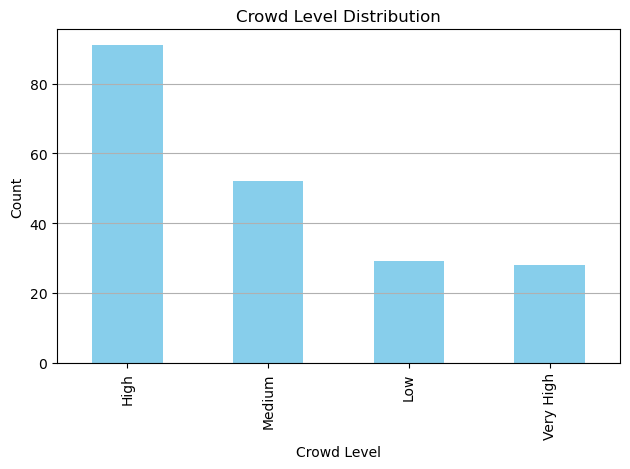

In [28]:
df['Crowd Level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Crowd Level Distribution')
plt.xlabel('Crowd Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Train No     200 non-null    int64 
 1   Station      200 non-null    object
 2   Time         200 non-null    object
 3   Day          200 non-null    object
 4   Crowd Level  200 non-null    object
 5   Time of Day  200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


In [30]:
# all objects are non-null
df.shape

(200, 6)

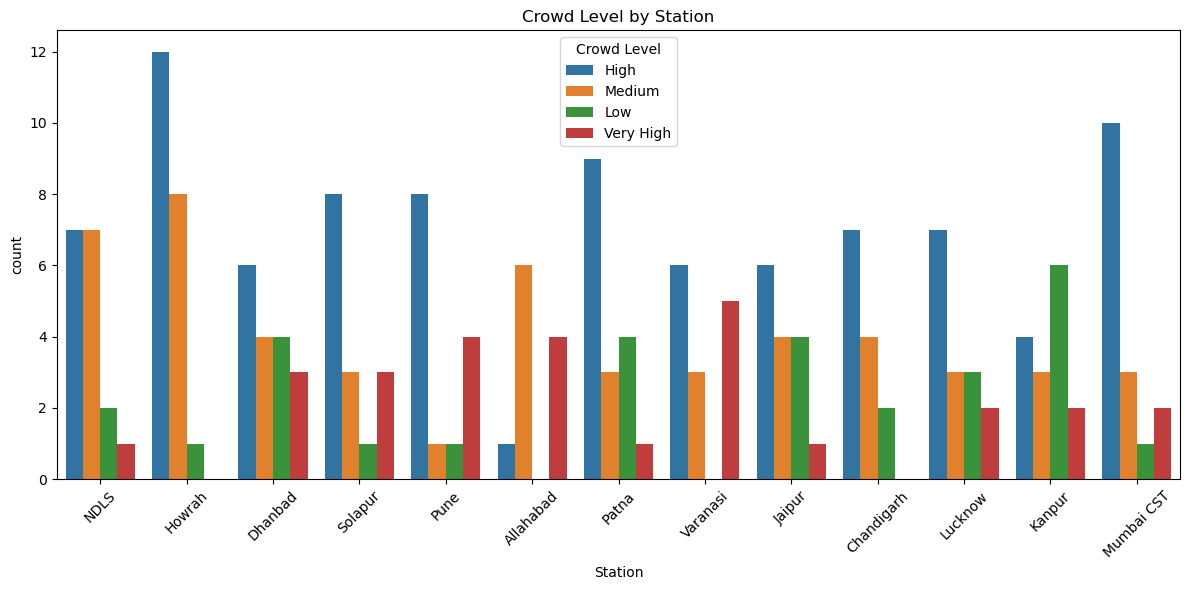

In [31]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.countplot(x = 'Station', hue = 'Crowd Level', data = df)
plt.title('Crowd Level by Station')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [32]:
station_crowd_day_level = df.groupby(['Station', 'Day', 'Crowd Level']).size().unstack(fill_value = 0)
print(station_crowd_day_level.head(10))

Crowd Level           High  Low  Medium  Very High
Station    Day                                    
Allahabad  Friday        0    0       1          0
           Monday        0    0       1          1
           Saturday      0    0       2          1
           Thursday      0    0       1          1
           Tuesday       1    0       1          0
           Wednesday     0    0       0          1
Chandigarh Friday        1    0       0          0
           Monday        0    1       0          0
           Saturday      2    1       1          0
           Sunday        2    0       0          0


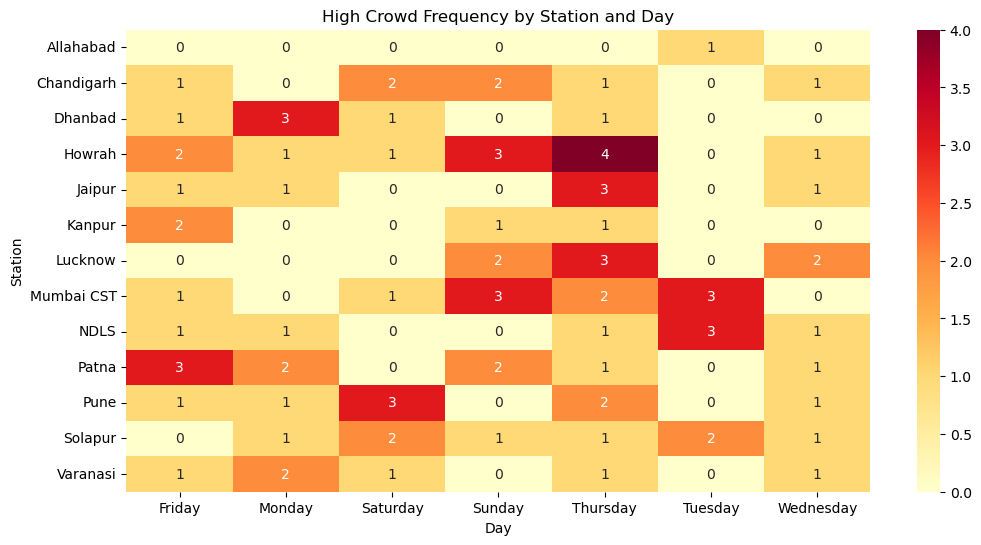

In [33]:
pivot = df.groupby(['Station', 'Day'])['Crowd Level'].value_counts().unstack().fillna(0)

# Heatmap for high crowd level 
high_crowd = pivot['High'].unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(high_crowd, cmap = 'YlOrRd', annot = True, fmt = 'g')
plt.title('High Crowd Frequency by Station and Day')
plt.xlabel('Day')
plt.ylabel('Station')
plt.show()

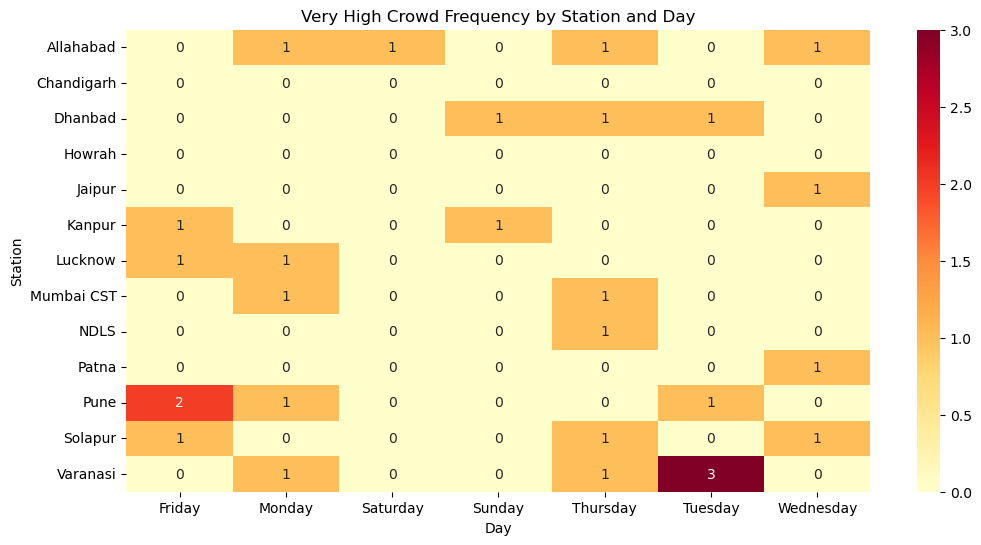

In [34]:
very_high_crowd = pivot['Very High'].unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(very_high_crowd, cmap = 'YlOrRd', annot = True, fmt = 'g')
plt.title('Very High Crowd Frequency by Station and Day')
plt.xlabel('Day')
plt.ylabel('Station')
plt.show()

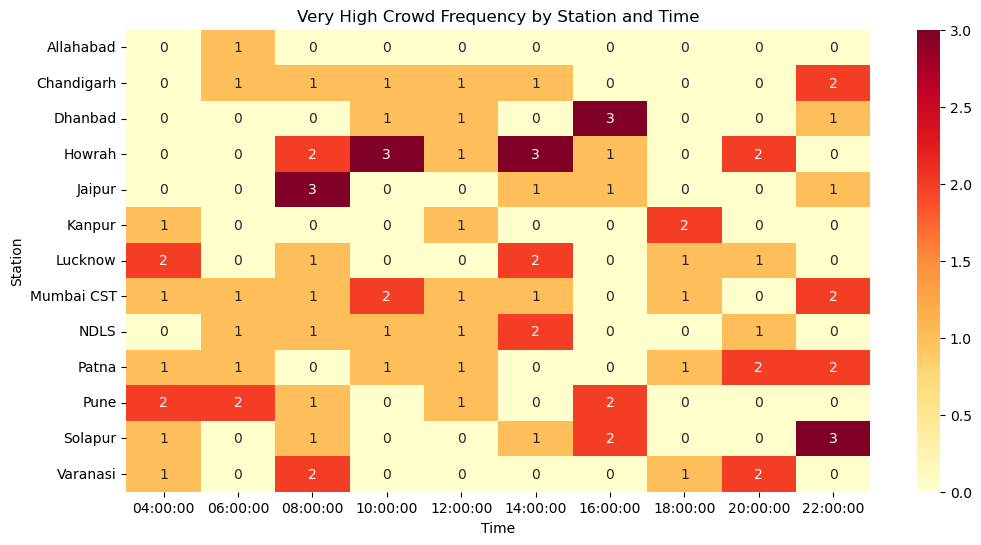

In [35]:
pivot = df.groupby(['Station', 'Time'])['Crowd Level'].value_counts().unstack().fillna(0)


high_crowd = pivot['High'].unstack().fillna(0)
plt.figure(figsize = (12,6))
sns.heatmap(high_crowd, cmap = 'YlOrRd', annot = True, fmt = 'g')
plt.title('Very High Crowd Frequency by Station and Time')
plt.xlabel('Time')
plt.ylabel('Station')
plt.show()

In [36]:
# We can clearly see that the 8am to 6 pm is having a major rush especially at bigger cities stations

In [37]:
X = df.drop('Crowd Level', axis = 1)

In [38]:
y = df['Crowd Level']

In [39]:
X.head()

,Train No,Station,Time,Day,Time of Day
0,12876,NDLS,14:00:00,Tuesday,Afternoon
1,14115,Howrah,12:00:00,Sunday,Afternoon
2,14265,Dhanbad,18:00:00,Friday,Evening
3,12261,Solapur,18:00:00,Saturday,Evening
4,12261,Solapur,08:00:00,Saturday,Morning


In [40]:
X.drop('Time of Day', axis = 1, inplace =True )

In [41]:
X.head(2)

,Train No,Station,Time,Day
0,12876,NDLS,14:00:00,Tuesday
1,14115,Howrah,12:00:00,Sunday


In [42]:
y.head()

0      High
1    Medium
2    Medium
3    Medium
4      High
Name: Crowd Level, dtype: object

In [43]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

In [44]:
X_train.head(2)

,Train No,Station,Time,Day
79,14265,Patna,12:00:00,Friday
197,12002,Mumbai CST,10:00:00,Thursday


In [45]:
X_test.head(2)

,Train No,Station,Time,Day
95,12261,NDLS,10:00:00,Friday
15,12002,NDLS,08:00:00,Monday


In [46]:
y_train.head(2)

79     Medium
197    Medium
Name: Crowd Level, dtype: object

In [47]:
y_test.head(2)

95    Medium
15      High
Name: Crowd Level, dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder

le_train_no = LabelEncoder()
le_station  = LabelEncoder()
le_day = LabelEncoder()
le_time = LabelEncoder()
le_target = LabelEncoder()



In [49]:
X_train['Train No'] = le_train_no.fit_transform(X_train['Train No'])
X_test['Train No'] = le_train_no.transform(X_test['Train No'])

In [50]:
X_train['Station'] = le_station.fit_transform(X_train['Station'])
X_test['Station'] = le_station.transform(X_test['Station'])

In [51]:
X_train['Time'] = le_time.fit_transform(X_train['Time'])
X_test['Time'] = le_time.transform(X_test['Time'])

In [52]:
X_train['Day'] = le_day.fit_transform(X_train['Day'])
X_test['Day'] = le_day.transform(X_test['Day'])

In [53]:
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
model_1 = RandomForestClassifier(n_estimators=100, class_weight = 'balanced',  random_state=42)
model_1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [56]:
y_pred = model_1.predict(X_test)

In [57]:
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

Accuracy:0.4


In [58]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.76      0.58        17
           1       0.00      0.00      0.00         8
           2       0.20      0.29      0.24         7
           3       1.00      0.12      0.22         8

    accuracy                           0.40        40
   macro avg       0.42      0.29      0.26        40
weighted avg       0.43      0.40      0.33        40



In [59]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[13  0  4  0]
 [ 6  0  2  0]
 [ 5  0  2  0]
 [ 4  1  2  1]]


In [60]:
# to check which feature contribute the most to the prediction

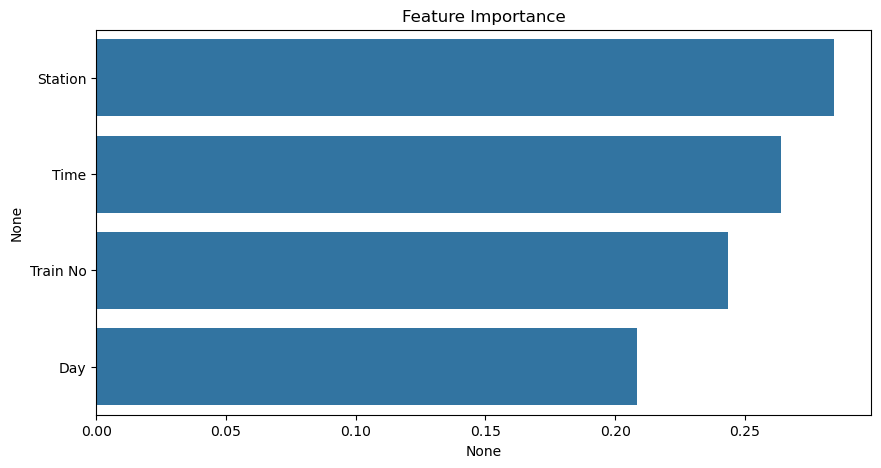

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model_1.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance")
plt.show()

In [62]:
le = LabelEncoder()
le.fit(df['Crowd Level'])  # Use your actual column name here

# View mapping
for i, class_name in enumerate(le.classes_):
    print(f"{i} → {class_name}")


0 → High
1 → Low
2 → Medium
3 → Very High


In [63]:
def classify_time_of_day(t):
    if t >= datetime.strptime('05:00', '%H:%M').time() and t < datetime.strptime('12:00', '%H:%M').time():
        return 'Morning'
    if t >= datetime.strptime('12:00', '%H:%M').time() and t < datetime.strptime('17:00', '%H:%M').time():
        return 'Afternoon'
    if t >= datetime.strptime('17:00', '%H:%M').time() and t < datetime.strptime('21:00', '%H:%M').time():
        return 'Evening'
    else:
        return 'Night'
df['Time of Day'] = df['Time'].apply(classify_time_of_day)

In [64]:
df.head(2)

,Train No,Station,Time,Day,Crowd Level,Time of Day
0,12876,NDLS,14:00:00,Tuesday,High,Afternoon
1,14115,Howrah,12:00:00,Sunday,Medium,Afternoon


In [65]:
df_new = df.drop('Time' , axis =1)

In [66]:
df_new.head(2)

,Train No,Station,Day,Crowd Level,Time of Day
0,12876,NDLS,Tuesday,High,Afternoon
1,14115,Howrah,Sunday,Medium,Afternoon


In [67]:
X = df_new.drop('Crowd Level', axis = 1)

In [68]:
X.head(3)

,Train No,Station,Day,Time of Day
0,12876,NDLS,Tuesday,Afternoon
1,14115,Howrah,Sunday,Afternoon
2,14265,Dhanbad,Friday,Evening


In [69]:
y = df_new['Crowd Level']

In [70]:
y.head(2)

0      High
1    Medium
Name: Crowd Level, dtype: object

In [71]:
le_station = LabelEncoder()
le_time_of_day = LabelEncoder()
le_day = LabelEncoder()
le_train_no = LabelEncoder()

In [72]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

In [73]:
X_test.head(2)

,Train No,Station,Day,Time of Day
95,12261,NDLS,Friday,Morning
15,12002,NDLS,Monday,Morning


In [74]:
X_train['Time of Day'] = le_time_of_day.fit_transform(X_train['Time of Day'])
X_test['Time of Day'] = le_time_of_day.transform(X_test['Time of Day'])

X_train['Train No'] = le_train_no.fit_transform(X_train['Train No'])
X_test['Train No'] = le_train_no.transform(X_test['Train No'])

X_train['Station'] = le_station.fit_transform(X_train['Station'])
X_test['Station'] = le_station.transform(X_test['Station'])

X_train['Day'] = le_day.fit_transform(X_train['Day'])
X_test['Day'] = le_day.transform(X_test['Day'])

y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

In [75]:
model_2 = RandomForestClassifier(n_estimators = 200, class_weight = 'balanced', random_state = 42)

In [76]:
model_2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [77]:
y_pred = model_2.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.3

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.65      0.54        17
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         7
           3       0.50      0.12      0.20         8

    accuracy                           0.30        40
   macro avg       0.24      0.19      0.18        40
weighted avg       0.29      0.30      0.27        40



In [80]:
le = LabelEncoder()
le.fit(df['Crowd Level'])  # Use your actual column name here

# View mapping
for i, class_name in enumerate(le.classes_):
    print(f"{i} → {class_name}")

0 → High
1 → Low
2 → Medium
3 → Very High


In [81]:
print(confusion_matrix(y_test, y_pred))

[[11  1  5  0]
 [ 4  0  4  0]
 [ 5  1  0  1]
 [ 4  2  1  1]]


In [82]:
df['Crowd Level'].value_counts()

Crowd Level
High         91
Medium       52
Low          29
Very High    28
Name: count, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
sm = SMOTE(random_state = 42)

In [85]:
X_train_res,y_train_res = sm.fit_resample(X_train, y_train)

In [86]:
model_3 = RandomForestClassifier(random_state = 42)

In [87]:
model_3.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [88]:
y_pred = model_3.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred, target_names = le.classes_))

              precision    recall  f1-score   support

        High       0.50      0.47      0.48        17
         Low       0.29      0.25      0.27         8
      Medium       0.20      0.29      0.24         7
   Very High       0.14      0.12      0.13         8

    accuracy                           0.33        40
   macro avg       0.28      0.28      0.28        40
weighted avg       0.33      0.33      0.33        40



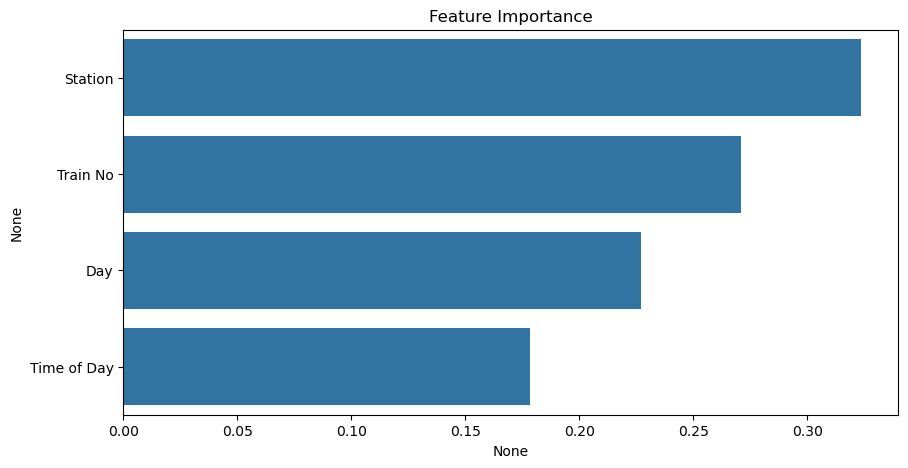

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model_3.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance")
plt.show()

In [91]:
df.drop('Time of Day', axis =1, inplace = True)

In [92]:
df.head(1)

,Train No,Station,Time,Day,Crowd Level
0,12876,NDLS,14:00:00,Tuesday,High


In [93]:
X = df.drop('Crowd Level', axis =1)

In [94]:
y = df['Crowd Level']

In [95]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)
le_station = LabelEncoder()
le_time = LabelEncoder()
le_day = LabelEncoder()
le_train_no = LabelEncoder()

In [96]:
X_train['Time'] = le_time.fit_transform(X_train['Time'])
X_test['Time'] = le_time.transform(X_test['Time'])

X_train['Train No'] = le_train_no.fit_transform(X_train['Train No'])
X_test['Train No'] = le_train_no.transform(X_test['Train No'])

X_train['Station'] = le_station.fit_transform(X_train['Station'])
X_test['Station'] = le_station.transform(X_test['Station'])

X_train['Day'] = le_day.fit_transform(X_train['Day'])
X_test['Day'] = le_day.transform(X_test['Day'])

y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

In [97]:
sm = SMOTE(random_state = 42)

In [98]:
X_train_res,y_train_res = sm.fit_resample(X_train, y_train)

In [99]:
model_4 = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

In [100]:
model_4.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [101]:
y_pred = model_4.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred, target_names = le.classes_))

              precision    recall  f1-score   support

        High       0.46      0.76      0.58        17
         Low       0.00      0.00      0.00         8
      Medium       0.20      0.29      0.24         7
   Very High       1.00      0.12      0.22         8

    accuracy                           0.40        40
   macro avg       0.42      0.29      0.26        40
weighted avg       0.43      0.40      0.33        40



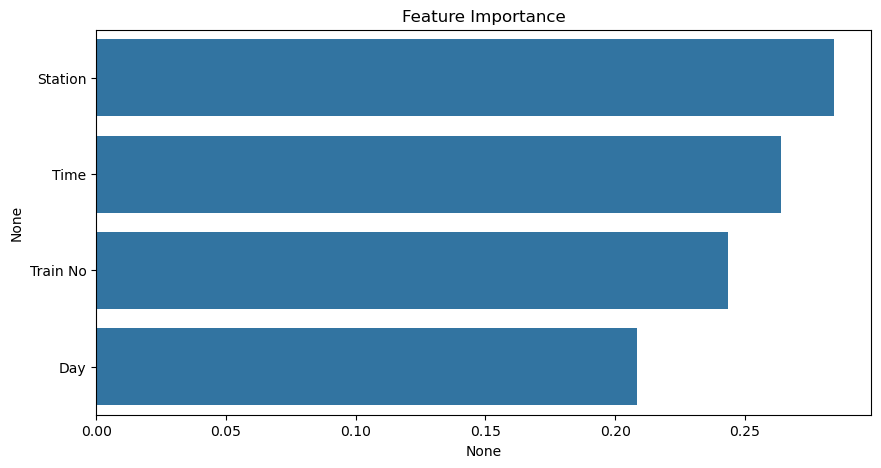

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model_4.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance")
plt.show()

In [104]:
df['Crowd Binary'] = df['Crowd Level'].replace({
    'High': 1,
    'Very High': 1,
    'Medium': 0,
    'Low': 0
})

C:\Users\kumar\AppData\Local\Temp\ipykernel_20952\3079189762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Crowd Binary'] = df['Crowd Level'].replace({


In [105]:
df.head(5)

,Train No,Station,Time,Day,Crowd Level,Crowd Binary
0,12876,NDLS,14:00:00,Tuesday,High,1
1,14115,Howrah,12:00:00,Sunday,Medium,0
2,14265,Dhanbad,18:00:00,Friday,Medium,0
3,12261,Solapur,18:00:00,Saturday,Medium,0
4,12261,Solapur,08:00:00,Saturday,High,1


In [106]:
df['Crowd Binary'].value_counts()

Crowd Binary
1    119
0     81
Name: count, dtype: int64

In [107]:
X = df.drop('Crowd Level', axis =1 )
X.drop('Crowd Binary', axis = 1, inplace = True)

In [108]:
X.head()

,Train No,Station,Time,Day
0,12876,NDLS,14:00:00,Tuesday
1,14115,Howrah,12:00:00,Sunday
2,14265,Dhanbad,18:00:00,Friday
3,12261,Solapur,18:00:00,Saturday
4,12261,Solapur,08:00:00,Saturday


In [109]:
y = df['Crowd Binary']

In [110]:
X_train,X_test,y_train,y_test = tts(X, y, test_size = 0.2, random_state = 42)

In [111]:
le_station = LabelEncoder()
le_train_no = LabelEncoder()
le_time = LabelEncoder()
le_day = LabelEncoder()

le_y = LabelEncoder()

X_train['Station'] = le_station.fit_transform(X_train['Station'])
X_test['Station'] = le_station.transform(X_test['Station'])

X_train['Train No'] = le_train_no.fit_transform(X_train['Train No'])
X_test['Train No'] = le_train_no.transform(X_test['Train No'])

X_train['Time'] = le_time.fit_transform(X_train['Time'])
X_test['Time'] = le_time.transform(X_test['Time'])

X_train['Day'] = le_day.fit_transform(X_train['Day'])
X_test['Day'] = le_day.transform(X_test['Day'])

y_train = le_y.fit_transform(y_train)
y_test = le_y.transform(y_test)

In [112]:
from sklearn.ensemble import RandomForestClassifier
model_5 = RandomForestClassifier(n_estimators=200, random_state = 42)
model_5.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [113]:
y_pred = model_5.predict(X_test)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.33      0.32        15
           1       0.58      0.56      0.57        25

    accuracy                           0.47        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.48      0.47      0.48        40



In [115]:
from sklearn.ensemble import RandomForestClassifier
model_6 = RandomForestClassifier(n_estimators=200, class_weight = 'balanced', random_state = 42)
model_6.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [116]:
y_pred = model_6.predict(X_test)

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.27      0.28        15
           1       0.58      0.60      0.59        25

    accuracy                           0.47        40
   macro avg       0.43      0.43      0.43        40
weighted avg       0.47      0.47      0.47        40



In [118]:
from xgboost import XGBClassifier

model_7 = XGBClassifier( eval_metric = 'logloss' ,scale_pos_weight=81/119, random_state = 42)
model_7.fit(X_train,y_train)
y_pred = model_7.predict(X_test)
print(f'Classification Report: \n{classification_report(y_test,y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.25      0.27      0.26        15
           1       0.54      0.52      0.53        25

    accuracy                           0.42        40
   macro avg       0.40      0.39      0.39        40
weighted avg       0.43      0.42      0.43        40



In [119]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [120]:
y_pred = grid_search.predict(X_test)

In [121]:
print(f'Classification Report: \n{classification_report(y_test,y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.23      0.20      0.21        15
           1       0.56      0.60      0.58        25

    accuracy                           0.45        40
   macro avg       0.39      0.40      0.40        40
weighted avg       0.43      0.45      0.44        40



In [124]:
import pickle

with open('best_model.pkl','wb') as f:
    pickle.dump(model_6, f)